In [1]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
print(os.listdir('./tensorboardlogs'))

dfs = []
for path in os.listdir('./tensorboardlogs'):
    for run in os.listdir(os.path.join('./tensorboardlogs', path)):
        fnm = os.path.join('./tensorboardlogs', path, run, 'results.csv')
        if not os.path.exists(fnm):
            continue
        df = pd.read_csv(fnm)
        df['model'] = path
        dfs.append(df)


['parallel_dense', 'cross_default', 'parallel_n01', 'parallel_m3', 'adam2', 'l2', 'yellow2', 'parallel_m2', 'yellow1', 'parallel_n02', 'parallel_multi_range', 'parallel_multi_range_tr', 'test', 'parallel_n0001', 'parallel_m1', 'parallel_default', 'parallel_m0']


In [3]:
df = pd.concat(dfs)

In [4]:
# Get rid of tests
df = df[df['model'] != 'test']

In [5]:
averages = df.groupby(('epoch','model')).mean().reset_index()
stds = df.groupby(('epoch', 'model')).std().reset_index()

In [6]:
avg_pv = averages.pivot(index='epoch', columns='model')

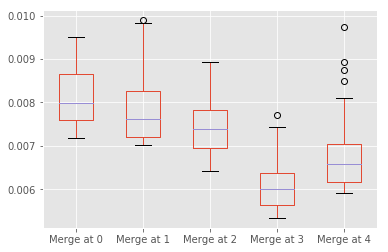

In [25]:
merge_point = avg_pv['mse'][['parallel_m0', 'parallel_m1', 'parallel_m2', 'parallel_m3', 'parallel_default']][200:]
renaming = {'parallel_m0': "Merge at 0", 'parallel_m1': "Merge at 1", 'parallel_m2': "Merge at 2", 'parallel_m3': "Merge at 3", 'parallel_default': "Merge at 4"}
merge_point.rename(columns=renaming, inplace=True)
merge_point.boxplot()


In [14]:
def plot_results(df, renaming, from_idx=200, xlabel='', rotation=0):
    subset = df['mse'][list(renaming.keys())][from_idx:]
    subset.rename(columns=renaming, inplace=True)
    subset.mean(axis=0).plot.bar(yerr=subset.std(axis=0))
    ax = plt.gca()
    ax.set_xlabel('')
    ax.set_ylabel('MSE')
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=rotation)

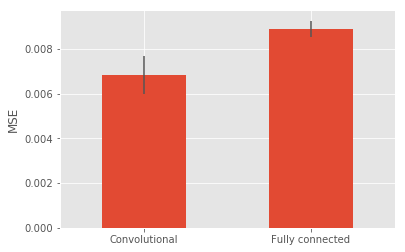

In [8]:
plot_results(avg_pv, {'parallel_default': "Convolutional", "cross_default": "Fully connected"})

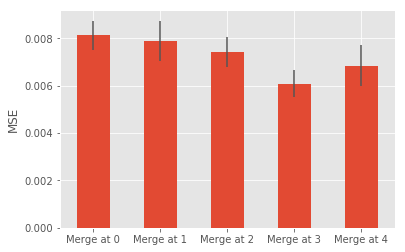

In [9]:
plot_results(avg_pv, {'parallel_m0': "Merge at 0", 'parallel_m1': "Merge at 1", 'parallel_m2': "Merge at 2", 
                      'parallel_m3': "Merge at 3", 'parallel_default': "Merge at 4"})

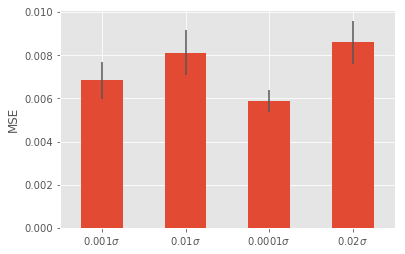

In [10]:
plot_results(avg_pv, {'parallel_default': "$0.001\sigma$", 'parallel_n01': "$0.01\sigma$", 
                      "parallel_n0001": "$0.0001\sigma$", 'parallel_n02': "$0.02\sigma$"})

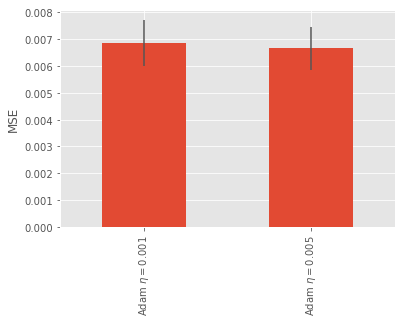

In [16]:
avg_pv.columns
plot_results(avg_pv, {'parallel_default': "Adam $\eta=0.001$", 'adam2': "Adam $\eta=0.005$"}, rotation=90)

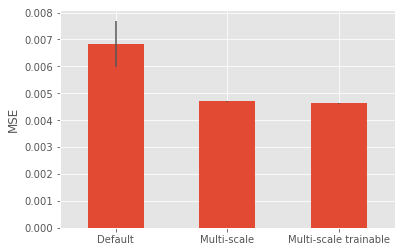

In [25]:
plot_results(avg_pv, {'parallel_default': "Default", 'parallel_multi_range': "Multi-scale",
                      'parallel_multi_range_tr': "Multi-scale trainable"}, rotation=0)

In [22]:
pmr = df[df['model'] == 'parallel_multi_range']

In [27]:
pmr[pmr['epoch'] == 249]['mse'].std()

0.00030361540634493499